## Global Precipitation Climatology Project (GPCP)

In [ ]:
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt

# path_gen = '/g/data/ua8/Precipitation/GPCP/day/v1-3'
path_gen = '/g/data/ia39/aus-ref-clim-data-nci/gpcp/data/day/v1-3'
year = '2021'
folder = path_gen + '/' + year

fileName = 'gpcp_v01r03_daily_d20210101_c20210408.nc'
path_full = folder + '/' + fileName

ds = xr.open_dataset(path_full)
ds

path_gen = '/g/data/ia39/aus-ref-clim-data-nci/gpcp/data/day/v1-3'
years = range(1996,2023)
folders = [f for f in os.listdir(path_gen) if (f.isdigit() and int(f) in years)]
folders = sorted(folders, key=int)

path_fileList = []
for folder in folders:
    path_folder = os.path.join(path_gen, folder)
    files = [f for f in os.listdir(path_folder) if f.endswith('.nc')]
    files = sorted(files, key=lambda x: x[x.index("y_d")+1:x.index("_c")])

    for file in files:
        path_fileList = np.append(path_fileList, os.path.join(path_folder, file))

ds = xr.open_mfdataset(path_fileList, combine='by_coords')
ds

precip = ds.precip.sel(latitude=slice(-35,35))
precip = precip.rename({'latitude': 'lat', 'longitude': 'lon'})
precip

def save_file(dataSet, folder, fileName):
    os.makedirs(folder, exist_ok=True)
    path = folder + '/' + fileName

    if os.path.exists(path):
        os.remove(path)    
    
    dataSet.to_netcdf(path)


folder = '/g/data/k10/cb4968/data/obs/GPCP'
fileName = 'GPCP_precip.nc'
dataSet = precip
save_file(dataSet, folder, fileName)


In [9]:
import xarray as xr
import numpy as np
from os.path import expanduser
home = expanduser("~")
import skimage.measure as skm

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [10]:
def plot_snapshot(var, cmap, variable_name, model):
    projection = ccrs.PlateCarree(central_longitude=180)
    lat = var.lat
    lon = var.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(15, 5))

    var.plot(transform=ccrs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title(variable_name + ' snapshot, model:' + model)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

In [35]:
folder = home + '/Documents/data/obs/ds'
fileName = 'GPCP_precip_raw.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (lat: 71, lon: 360, time: 9343)
Coordinates:
  * lat      (lat) float32 -35.0 -34.0 -33.0 -32.0 -31.0 ... 32.0 33.0 34.0 35.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2022-04-30
Data variables:
    precip   (time, lat, lon) float32 ...

In [36]:
precip = ds.precip
precip

<xarray.DataArray 'precip' (time: 9343, lat: 71, lon: 360)>
[238807080 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -35.0 -34.0 -33.0 -32.0 -31.0 ... 32.0 33.0 34.0 35.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2022-04-30
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Ga...
    standard_name:  lwe_precipitation_rate
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean
    coordinates:    time latitude longitude

In [6]:
ds.precip.encoding

{'zlib': False,
 'shuffle': False,
 'complevel': 0,
 'fletcher32': False,
 'contiguous': True,
 'chunksizes': None,
 'source': '/Users/cbla0002/Documents/data/obs/ds/GPCP_precip.nc',
 'original_shape': (9294, 71, 360),
 'dtype': dtype('float32'),
 '_FillValue': nan}

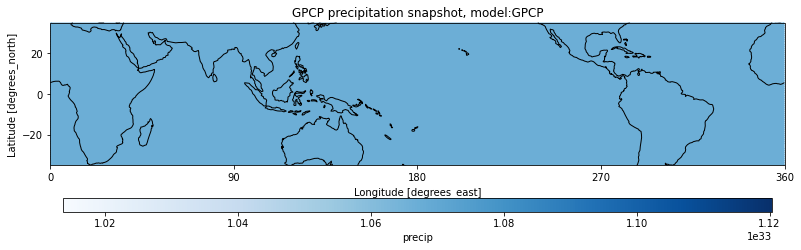

In [7]:
plot_snapshot(precip.mean(dim='time'), 'Blues', 'GPCP precipitation', 'GPCP')

In [37]:
valid_range = [0, 10000]
precip = precip.where((precip >= valid_range[0]) & (precip <= valid_range[1]), np.nan)

In [30]:
np.max(precip)

<xarray.DataArray 'precip' ()>
array(99.99098206)

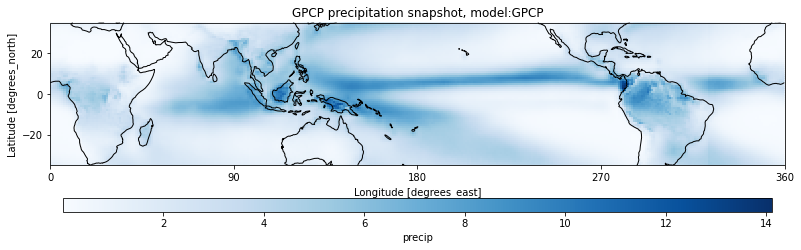

In [150]:
plot_snapshot(precip.mean(dim='time'), 'Blues', 'GPCP precipitation', 'GPCP')

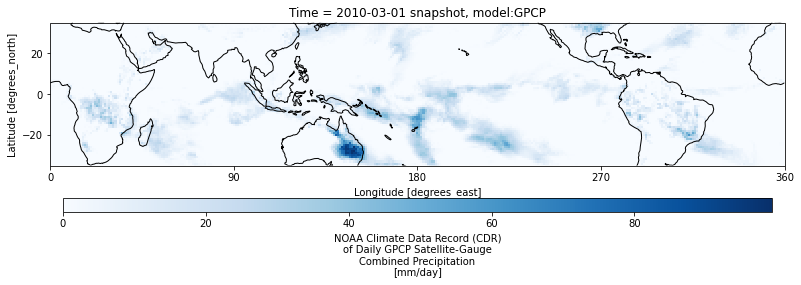

In [32]:
pr_day = precip.sel(time='2010-03-01')
plot_snapshot(pr_day, 'Blues', "Time = " + str(pr_day.coords['time'].values)[:10],'GPCP')

In [12]:
nan_count_time = pr_day.isnull().sum(dim=('lat', 'lon'))
nan_count_time

NameError: name 'pr_day' is not defined

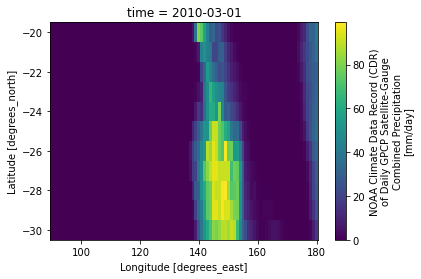

In [33]:
pr_day.sel(lat=slice(-30,-20), lon=slice(90,180)).plot()

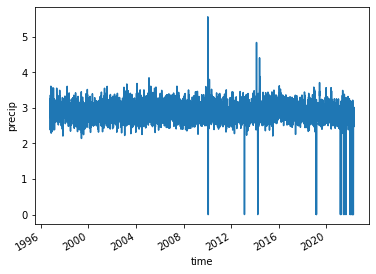

In [154]:
precip.mean(dim = ('lat', 'lon')).plot()

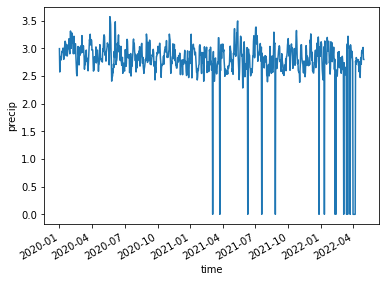

In [155]:
precip.sel(time = slice('2020-01', '2022-12')).mean(dim = ('lat', 'lon')).plot()

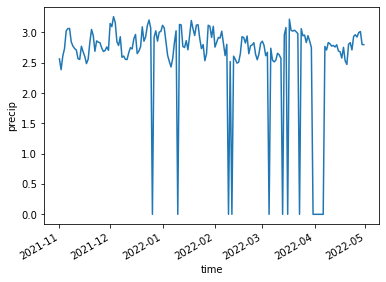

In [156]:
precip.sel(time = slice('2021-11-01', '2022-12-12')).mean(dim = ('lat', 'lon')).plot()

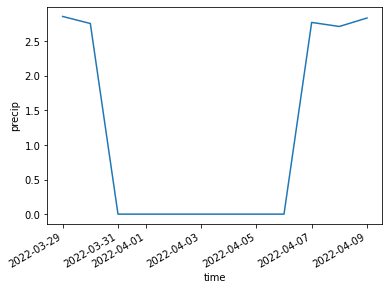

In [157]:
precip.sel(time = slice('2022-03-29', '2022-04-09')).mean(dim = ('lat', 'lon')).plot()

In [139]:
section = precip.sel(time = slice('1996-11-25', '1996-12-04'))

In [296]:
for i in range(len(section.time.values)):

    plot_snapshot(section.isel(time=i), 'Blues', "Time = " + str(section.coords['time'].values[i])[:10],'GPCP')

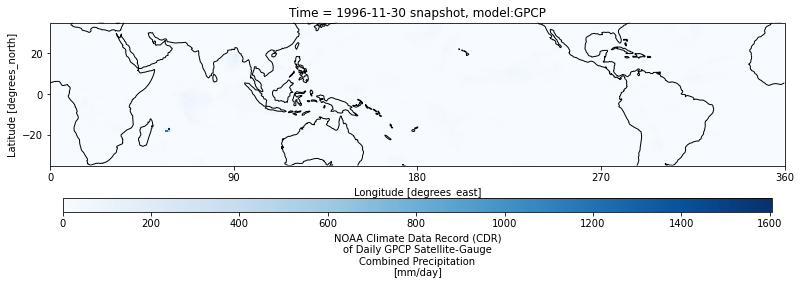

In [276]:
time_test = '1996-11-30'

plot_snapshot(precip.sel(time=time_test), 'Blues', "Time = " + time_test,'GPCP')

In [122]:
precip.sel(time=time_test).mean(dim=('lat','lon'))

<xarray.DataArray 'precip' ()>
array(3.5967507, dtype=float32)
Coordinates:
    time     datetime64[ns] 1996-11-30

In [34]:
((precip > 100) & (precip < 200)).sum().values

array(0)

In [262]:
(precip > 100).sum().values

array(8083)

In [271]:
(precip > 200).sum().values

array(0)

In [226]:
precip_high = precip * (precip > 180)*1

In [189]:
np.shape(np.unique(precip_high))

(33,)

In [227]:
print(np.sort(np.unique(precip_high)))

[   0.       180.30067  180.7888   181.05753  183.01814  184.59824
  184.68253  185.0011   188.87772  190.14854  190.76006  195.6903
  201.06107  203.13046  206.2705   210.70753  215.9421   219.59258
  222.25842  236.90428  246.41144  263.25052  274.57025  275.93082
  299.65448  324.76172  330.74554  368.1727   423.67694  491.0421
  512.9324   552.5309   586.0325   598.6664   621.5313   819.6517
  823.9937   883.8219   999.5709  1173.4381  1353.7328  1605.5956
 2252.7998         nan]


In [40]:
time_index = precip.where(precip >= 2000, drop=True).time.values

In [41]:
time_index

array(['2014-05-23T00:00:00.000000000'], dtype='datetime64[ns]')

array([], dtype='datetime64[ns]')

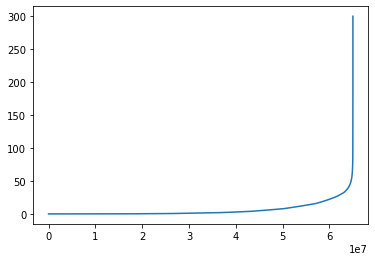

In [234]:
plt.plot(np.sort(np.unique(precip.fillna(0))))

In [159]:
np.max(precip)

<xarray.DataArray 'precip' ()>
array(195.69030762)

In [72]:
time_test

'2019-02-21'

In [277]:
np.max(precip.sel(time=time_test))

<xarray.DataArray 'precip' ()>
array(1605.59558105)
Coordinates:
    time     datetime64[ns] 1996-11-30

In [124]:
precip.sel(time=time_test).isnull().sum(dim=('lat', 'lon'))

<xarray.DataArray 'precip' ()>
array(2)
Coordinates:
    time     datetime64[ns] 1996-11-30

In [283]:
nan_count_time = precip.isnull().sum(dim=('lat', 'lon'))
nan_count_time

<xarray.DataArray 'precip' (time: 9343)>
array([0, 0, 0, ..., 0, 0, 0])
Coordinates:
  * time     (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2022-04-30

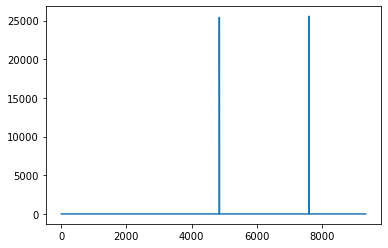

In [284]:
plt.plot(nan_count_time)

In [285]:
nan_list = (nan_count_time<20000)*1

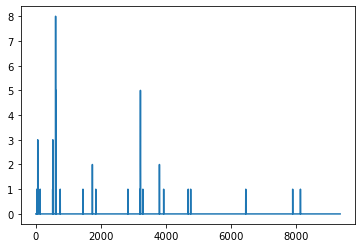

In [286]:
plt.plot(nan_list*nan_count_time)

In [292]:
nan_list1 = (nan_count_time<20000)*1
nan_list2 = (nan_count_time>0)*1
nan_listAll = nan_list1 * nan_list2
np.sum(nan_listAll)

<xarray.DataArray 'precip' ()>
array(30)

In [303]:
list_withNanN = np.unique(np.arange(0,9343)*nan_listAll)[1:]

In [305]:
list_withNanN

array([  30,   60,  135,  518,  522,  523,  608,  609,  613,  614,  618,
        620,  750, 1448, 1737, 1841, 2828, 3194, 3211, 3212, 3213, 3287,
       3795, 3925, 4679, 4754, 6443, 6445, 7885, 8123])

In [15]:
# for i in list_withNanN[:15]:
#     plot_snapshot(precip.isel(time=i), 'Blues', "Time = " + str(precip.coords['time'].values[i])[:10],'GPCP')

In [293]:
len(nan_list)

9343

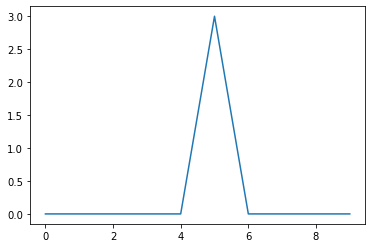

In [146]:
plt.plot(nan_list*nan_count_time[55:65])

In [115]:
for i in np.arange(55,65):
    print(str(precip.time.values[i])[:10])

1996-11-25
1996-11-26
1996-11-27
1996-11-28
1996-11-29
1996-11-30
1996-12-01
1996-12-02
1996-12-03
1996-12-04


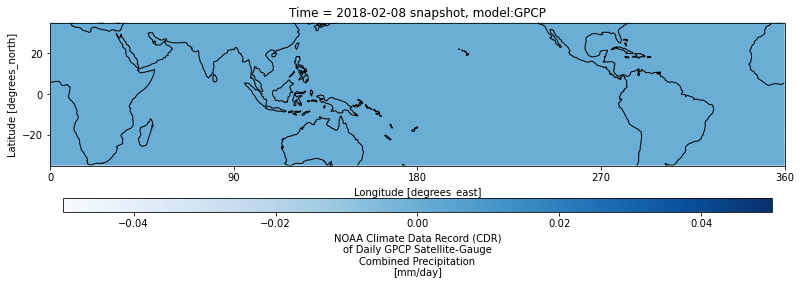

In [70]:
time_test = '2019-02-21'

plot_snapshot(precip.sel(time=time_test), 'Blues', "Time = " + time_test,'GPCP')

Text(0.5, 0, 'days')

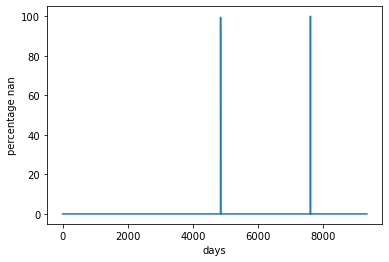

In [23]:
gridboxes_NB = np.shape(precip.isel(time=0))[0] * np.shape(precip.isel(time=0))[1]
nan_count_time = precip.isnull().sum(dim=('lat', 'lon'))
percentage_nan = (nan_count_time/gridboxes_NB)*100
plt.plot(percentage_nan)
plt.ylabel('percentage nan')
plt.xlabel('days')

In [24]:
print('total number of days:',len(precip.time.data))
print('number of gridboxes:', gridboxes_NB)
print('how many gridboxes a certain fraciton of nan is:', gridboxes_NB *0.5 *0.01)

total number of days: 9343
number of gridboxes: 25560
how many gridboxes a certain fraciton of nan is: 127.8


In [25]:
np.sum((percentage_nan>0.5)*1)

<xarray.DataArray 'precip' ()>
array(6)

In [ ]:
# data.interpolate_na(dim=['lat','lon'])

In [ ]:
# data = data.where(data.sum(axis=(1,2)) != 0)

In [ ]:
# threshold = 0.1
# data = data.where(data.isnull().sum(dim=('lat','lon'))/(data.shape[1]*data.shape[2]) < threshold, other=np.nan)

In [ ]:
# drop days that have all np.nan
# data = data.dropna('time', how='all')

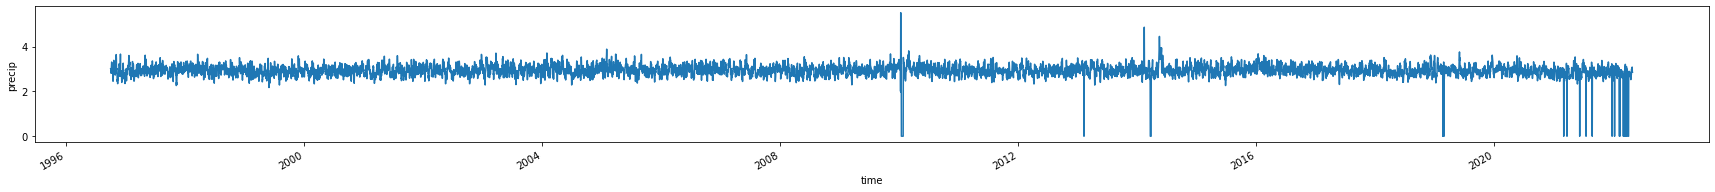

In [26]:
aWeights = np.cos(np.deg2rad(precip.lat))
precip_sMean= precip.weighted(aWeights).mean(dim=('lat','lon'))

fig = plt.figure(figsize=(30,2.5))
precip_sMean.plot()

In [27]:
def calc_pr_percentiles(precip):

    pr95 = precip.quantile(0.95,dim=('lat','lon'),keep_attrs=True, skipna=True)
    pr95 = xr.DataArray(
        data = pr95.data,
        dims = ['time'],
        coords = {'time': precip.time.data}, 
        attrs = {'units':'mm/day'}
        )

    pr97 = precip.quantile(0.97,dim=('lat','lon'),keep_attrs=True, skipna=True)
    pr97 = xr.DataArray(
        data = pr97.data,
        dims = ['time'],
        coords = {'time': precip.time.data},
        attrs = {'units':'mm/day'}
        )

    pr99 = precip.quantile(0.99,dim=('lat','lon'),keep_attrs=True, skipna=True)
    pr99 = xr.DataArray(
        data = pr99.data,
        dims = ['time'],
        coords = {'time': precip.time.data},
        attrs = {'units':'mm/day'}
        )

    pr999 = precip.quantile(0.999,dim=('lat','lon'),keep_attrs=True, skipna=True)
    pr999 = xr.DataArray(
        data = pr999.data,
        dims = ['time'],
        coords = {'time': precip.time.data},
        attrs = {'units':'mm/day'}
        )
        

    pr_percentiles = xr.Dataset(
        data_vars = {'pr95': pr95, 
                     'pr97': pr97, 
                     'pr99': pr99, 
                     'pr999': pr999}
        ) 

    return pr_percentiles

In [28]:
pr_percentiles = calc_pr_percentiles(precip)
pr_percentiles

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<xarray.Dataset>
Dimensions:  (time: 9343)
Coordinates:
  * time     (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2022-04-30
Data variables:
    pr95     (time) float64 17.75 18.43 17.45 16.35 ... 17.24 17.49 16.04 16.1
    pr97     (time) float64 22.97 22.63 22.75 21.32 ... 21.89 22.22 20.54 20.22
    pr99     (time) float64 34.5 33.1 32.71 32.32 ... 31.05 31.92 29.41 28.63
    pr999    (time) float64 59.23 64.19 55.71 51.78 ... 51.35 61.91 46.31 44.31

In [29]:
conv_threshold = pr_percentiles.pr97.mean(dim='time')
conv_threshold

<xarray.DataArray 'pr97' ()>
array(22.37765097)

In [30]:
lat = precip.lat.data
lon = precip.lon.data
lonm,latm = np.meshgrid(lon,lat)
dlat = (lat[1]-lat[0])
dlon = (lon[1]-lon[0])
R = 6371
aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)
latm3d = np.expand_dims(latm,axis=2) # used for broadcasting
lonm3d = np.expand_dims(lonm,axis=2)
day = 0

In [31]:
pr_day = precip.isel(time=day)
L = skm.label(pr_day.where(pr_day>=conv_threshold,0)>0, background=0,connectivity=2)

connect_boundary(L)
labels = np.unique(L)[1:]

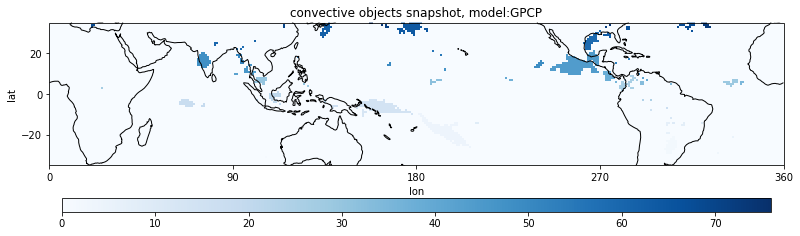

In [32]:
L_xr = xr.DataArray(
    data=L,
    dims=['lat', 'lon'],
    coords={'lat': pr_day.lat.data, 'lon': pr_day.lon.data}
    )
plot_snapshot(L_xr, 'Blues', 'convective objects', 'GPCP')

In [33]:
rome_scene(L, labels, lat, lon, aream, latm3d, lonm3d)

225832.6235720079

In [34]:
# rome = calc_rome(precip, conv_threshold)

In [35]:
saveit = False           
model = 'gpcp'
experiment = 'historical'
folder = home + '/Documents/data/cmip5/' + model
rome_n = np.ones(len(rome))*np.nan

if saveit:  
    fileName = model + '_rome_' + experiment + '.nc'              
    dataset = xr.Dataset(
        data_vars = {'rome':rome, 
                    'rome_n':rome_n},
        attrs = {'description': 'ROME based on all and the {} largest contiguous convective regions in the scene for each day'.format(n),
                    'units':'km^2'}                  
            )
    save_file(dataset, folder, fileName)

NameError: name 'rome' is not defined

In [ ]:
rome_options = [
    'rome',
    # 'rome_n'
    ]
rome_option = rome_options[0]

In [ ]:
percentile_options = [
    # 'pr95',
    # 'pr97',
    'pr99',
    # 'pr999',
    ]
percentile_option = percentile_options[0]

In [ ]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (35,14))
f.suptitle(percentile_option + ' (daily) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentiles = xr.open_dataset(path)


    y = pr_percentiles[percentile_option].data
    x= np.arange(0,len(y),1)
    rome_prctile = np.percentile(rome[rome_option],95)
    x2= np.argwhere(rome[rome_option].data>=rome_prctile)

    ax.plot(x,y, label=percentile_option)
    ax.scatter(x2,y[x2],label='ROME top 5%', color='r')
    ax.axhline(y=np.mean(y), color='k')
    ax.set_title(model)
    # ax.set_ylim(0,100)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('days')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel(percentile_option + ' [mm/day]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()
plt.legend(bbox_to_anchor=(1.3, 0.85))